<a href="https://colab.research.google.com/github/JSA-V/freeCodeCamp-projects/blob/main/fcc_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 25
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [ ]:
# 3
train_image_generator=ImageDataGenerator(rescale=1/255)
validation_image_generator = ImageDataGenerator(rescale=1/255)
test_image_generator = ImageDataGenerator(rescale=1/255)

train_data_gen = train_image_generator.flow_from_directory('cats_and_dogs/train',
                                                           (IMG_HEIGHT,IMG_WIDTH),
                                                           batch_size=batch_size,
                                                           class_mode='binary')
val_data_gen = train_image_generator.flow_from_directory('cats_and_dogs/validation',
                                                           (IMG_HEIGHT,IMG_WIDTH),
                                                           batch_size=batch_size,
                                                           class_mode='binary')
test_data_gen = train_image_generator.flow_from_directory('cats_and_dogs',
                                                           (IMG_HEIGHT,IMG_WIDTH),
                                                           classes=['test'],
                                                           batch_size=batch_size,
                                                          shuffle=False,
                                                          class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


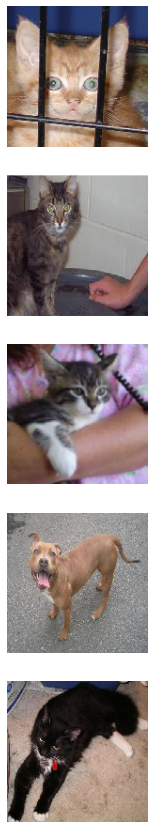

In [ ]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [ ]:
# 5
train_image_generator=ImageDataGenerator(rescale=1/255,
                                         rotation_range=40,
                                         width_shift_range=0.2,
                                         height_shift_range=0.2,
                                         shear_range=0.2,
                                         zoom_range=0.2,
                                         horizontal_flip=True,)



Found 2000 images belonging to 2 classes.


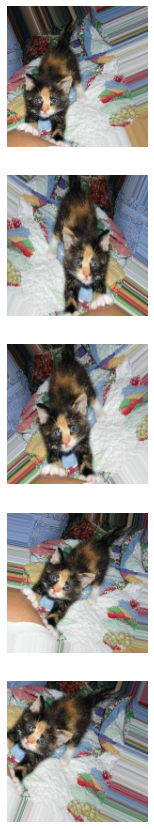

In [ ]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)
#print(train_data_gen[0][0][0].shape)

In [ ]:
# 7

model = Sequential([
	Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)), # same shape of images
	MaxPooling2D(2,2),
    
	Conv2D(32, (3,3), activation='relu'),
	MaxPooling2D(2,2), 
    
	Conv2D(64, (3,3), activation='relu'), 
	MaxPooling2D(2,2),
    
	Flatten(), 
    
	Dense(512, activation='relu'), 
    
	Dense(1, activation='sigmoid')  
	])

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              #loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [ ]:
# 8

history = model.fit(train_data_gen,epochs=epochs, 
                    validation_data=val_data_gen,
                    #steps_per_epoch=100,
                    #validation_steps=50
                    )

#history = model.fit(train_data_gen,epochs=4,
#                    steps_per_epoch=10, 
#                    validation_data=val_data_gen,validation_steps=10)

Epoch 1/25
16/16 [==============================] - 70s 4s/step - loss: 1.1182 - accuracy: 0.5020 - val_loss: 0.6854 - val_accuracy: 0.5000
Epoch 2/25
16/16 [==============================] - 66s 4s/step - loss: 0.6876 - accuracy: 0.5410 - val_loss: 0.6845 - val_accuracy: 0.5460
Epoch 3/25
16/16 [==============================] - 68s 4s/step - loss: 0.6751 - accuracy: 0.5725 - val_loss: 0.6450 - val_accuracy: 0.5790
Epoch 4/25
16/16 [==============================] - 66s 4s/step - loss: 0.6748 - accuracy: 0.5960 - val_loss: 0.6359 - val_accuracy: 0.6530
Epoch 5/25
16/16 [==============================] - 66s 4s/step - loss: 0.6916 - accuracy: 0.5900 - val_loss: 0.6333 - val_accuracy: 0.6300
Epoch 6/25
16/16 [==============================] - 67s 4s/step - loss: 0.6463 - accuracy: 0.6110 - val_loss: 0.6332 - val_accuracy: 0.6510
Epoch 7/25
16/16 [==============================] - 67s 4s/step - loss: 0.6311 - accuracy: 0.6470 - val_loss: 0.5990 - val_accuracy: 0.6630
Epoch 8/25
16/16 [==

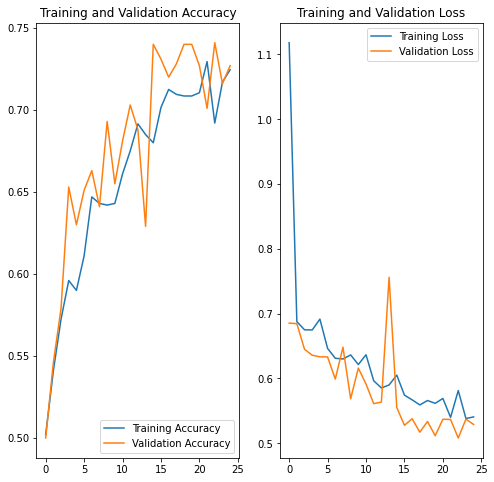

In [ ]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 1s 840ms/step
[0.69521594 0.39311182 0.00471513 0.9837608  0.47029835 0.6063591
 0.8808655  0.23172554 0.78824574 0.99557465 0.27436298 0.78786796
 0.5223643  0.38216493 0.67254025 0.8477589  0.8969743  0.9395061
 0.69700897 0.8437739  0.24200138 0.66799486 0.4430996  0.705909
 0.9094383  0.33795276 0.966896   0.3082397  0.33027905 0.82247084
 0.51989484 0.17148708 0.9523297  0.99999183 0.5616378  0.8524742
 0.9989254  0.9241284  0.50738823 0.48008776 0.47746316 0.42970333
 0.98944473 0.92358595 0.35181746 0.5793399  0.7003473  0.06549722
 0.38065833 0.40657237]


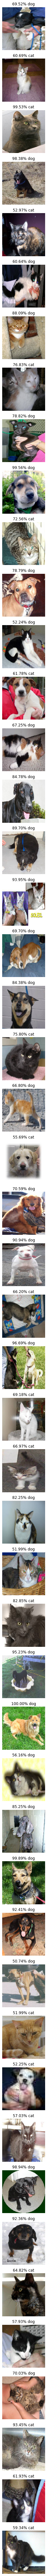

In [ ]:
test_images, _ = next(test_data_gen)
probabilities=model.predict(test_data_gen).reshape(-1,)

print(probabilities)
plotImages(test_images,probabilities)

In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 70.0% of the images of cats and dogs.
You passed the challenge!
